In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Car Sale.csv')
df = pd.DataFrame(df)

In [218]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date']) 

In [6]:
df['Phone'] = df['Phone'].astype(str)

In [7]:
df.rename(columns = {'Price ($)' : 'price_in_usd'}, inplace = True)

In [8]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

**1. What is the average selling price of cars for each dealer, and how does it compare across different dealers.**

In [10]:
avg_price_by_dealer = df.groupby('dealer_name')['price_in_usd'].mean().reset_index()

In [11]:
avg_price_by_dealer = avg_price_by_dealer.sort_values(by = 'price_in_usd', ascending = False)

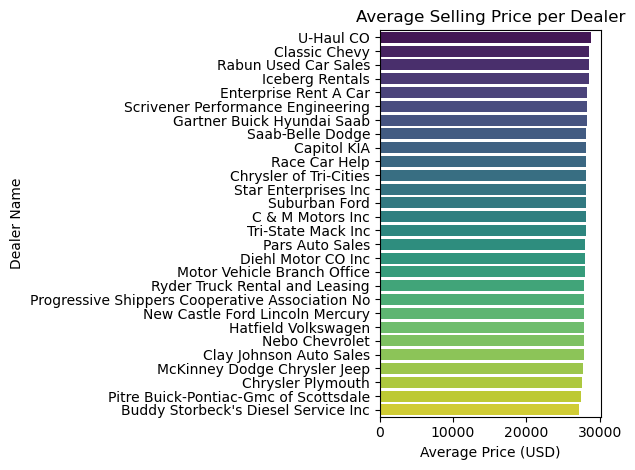

In [12]:
sns.barplot(x = 'price_in_usd', y = 'dealer_name', data = avg_price_by_dealer, palette = 'viridis')
plt.title('Average Selling Price per Dealer')
plt.xlabel('Average Price (USD)')
plt.ylabel('Dealer Name')
plt.tight_layout()
plt.show()
plt.show()

Insights - 
- Huge Price Gap Between Dealers
    - There's a very wide range in average selling prices — from under $5,000 (e.g., U-Haul CO, Classic Chevy) to nearly $30,000 (e.g., Buddy Storbeck's Diesel Service Inc).

    - This suggests that some dealers focus on budget or rental vehicles, while others specialize in high-end or heavy-duty vehicles.

- Premium Dealers Stand Out
    - Dealers like Buddy Storbeck's, Pitre Buick-Pontiac-GMC, and McKinney Dodge Chrysler Jeep have the highest average prices, indicating they likely sell newer, premium, or specialized models.
    - These dealers may target wealthier customer segments or commercial buyers (e.g., trucks, diesel). 

**2.  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

In [15]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')

In [16]:
price_variation = df.groupby('company')['price_in_usd'].std().reset_index() 

In [17]:
price_variation.rename(columns = {'price_in_usd' : 'price_std_dev'}, inplace = True)

In [18]:
price_variation = price_variation.sort_values(by = 'price_std_dev', ascending=False)

In [19]:
print(price_variation.head(10))

     company  price_std_dev
15   Lincoln   19658.050211
24      Saab   19653.740089
4   Cadillac   19517.120220
21  Plymouth   19065.997338
14     Lexus   17852.923492
3      Buick   17142.232626
17   Mercury   16445.172195
19    Nissan   16214.264017
25    Saturn   15990.223671
8       Ford   15849.090227


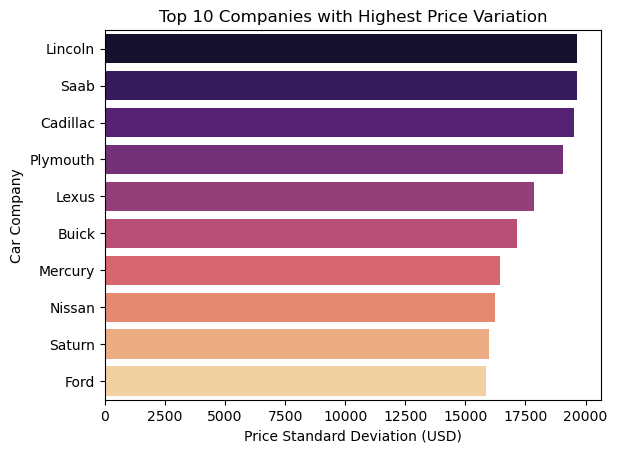

In [20]:
sns.barplot(x='price_std_dev', y='company', data=price_variation.head(10), palette='magma')
plt.title('Top 10 Companies with Highest Price Variation')
plt.xlabel('Price Standard Deviation (USD)')
plt.ylabel('Car Company')
plt.show()

Insights - 
- Luxury or premium brands show the most price variation
    - Lincoln, Saab, and Cadillac top the list with the highest standard deviation in prices.
    - This suggests these companies offer a wide range of car models, from budget-friendly to high-end/luxury vehicles.

- Even mainstream brands like Ford and Nissan have significant variation
    - Although not traditionally considered luxury brands, Ford and Nissan also appear in the top 10.
    - This indicates these companies may have both economy and premium models, contributing to price variation.

**3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges 
compare.**

In [23]:
df['transmission'].value_counts()

transmission
Auto      12571
Manual    11335
Name: count, dtype: int64

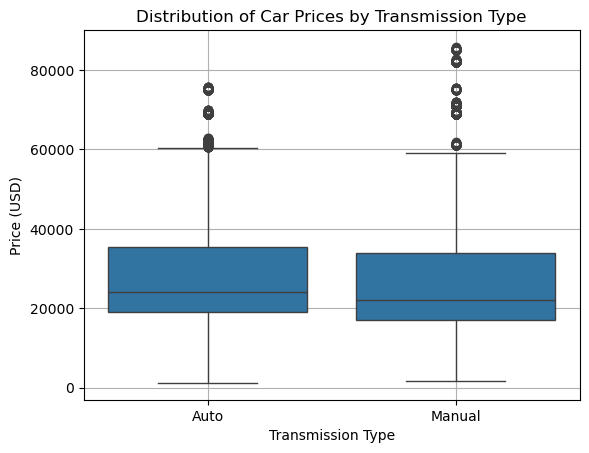

In [24]:
sns.boxplot(x='transmission', y='price_in_usd', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

Insights - 
- Similar IQR for Both Transmission Types
    - Both Auto and Manual cars have a comparable IQR — the middle 50% of prices fall between roughly $15,000 and $35,000.
    - This indicates that most cars, regardless of transmission, are priced within a similar range.

- Manual Cars Have More High-Price Outliers
    - The manual transmission group shows more high-value outliers (cars priced above $60,000 and even $80,000).
    - This suggests that while manual cars are generally similar in average pricing to autos, some premium models with manual transmission exist, possibly performance or specialty cars.   

**4.  What is the distribution of car prices across different regions?**

In [27]:
df['dealer_region'].unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

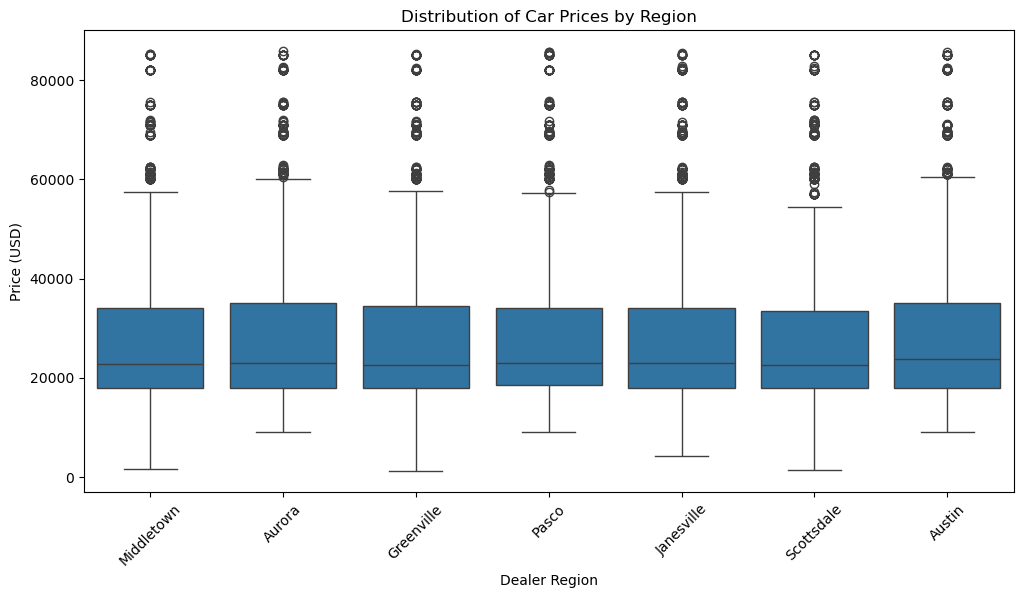

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='dealer_region', y='price_in_usd', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

- The region with the highest median car price is Austin, indicating it tends to sell more expensive vehicles on average.

- Pasco shows the widest interquartile range, suggesting a greater variety in car prices in that region.

- Regions like Greenville, Austin, and Middletown have many high-price outliers, pointing toward some luxury or premium models being sold there.

**5.  What is the distribution of cars based on body styles?**

In [31]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')

In [32]:
df['body_style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

In [33]:
body_counts = df['body_style'].value_counts().reset_index()

In [34]:
body_counts.columns = ['body_style', 'count']

In [35]:
body_counts

,body_style,count
0,SUV,6374
1,Hatchback,6128
2,Sedan,4488
3,Passenger,3945
4,Hardtop,2971


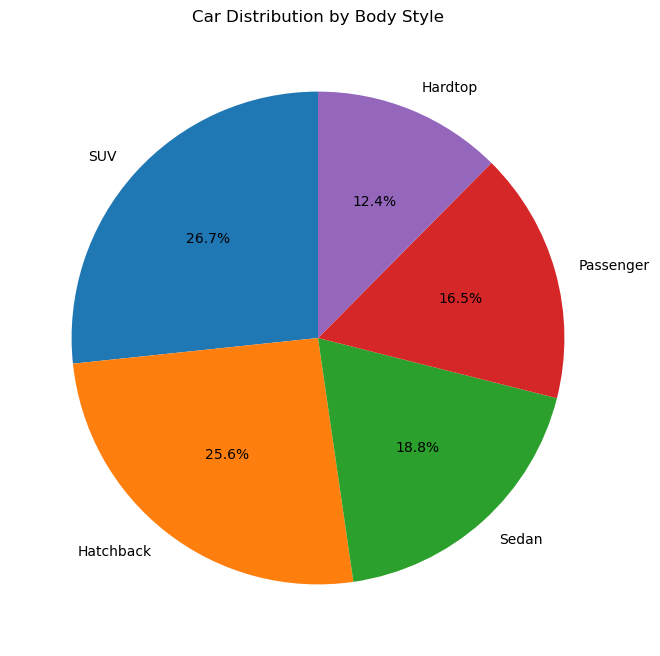

In [36]:
df['body_style'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8), startangle=90)
plt.title('Car Distribution by Body Style')
plt.ylabel('')
plt.show()

- Insights from Car Body Style Distribution:
    - SUVs are the most common body style, making up 26.7% of all cars, followed closely by Hatchbacks at 25.6%.
        - This suggests that compact and utility vehicles are the most popular choices.

    - Hardtops and Passenger vans are the least common, accounting for just 12.4% and 16.5%, respectively.
        - These may serve niche markets or be less in demand.

**6. How does the average selling price of cars vary by customer gender and annual income?**

In [40]:
bins = [0, 30000, 60000, 90000, 120000, df['annual_income'].max()]

In [41]:
labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K+']

In [42]:
df['income_range'] = pd.cut(df['annual_income'], bins=bins, labels=labels)

In [43]:
df['income_range'].head(5)

0    0-30K
1    120K+
2    120K+
3    0-30K
4    120K+
Name: income_range, dtype: category
Categories (5, object): ['0-30K' < '30K-60K' < '60K-90K' < '90K-120K' < '120K+']

In [44]:
avg_price = df.groupby(['gender', 'income_range'])['price_in_usd'].mean().reset_index()
avg_price

,gender,income_range,price_in_usd
0,Female,0-30K,28132.038732
1,Female,30K-60K,NaN
2,Female,60K-90K,NaN
3,Female,90K-120K,46001.000000
4,Female,120K+,28314.347520
5,Male,0-30K,27816.302247
6,Male,30K-60K,NaN
7,Male,60K-90K,43000.000000
8,Male,90K-120K,NaN
9,Male,120K+,28101.413494


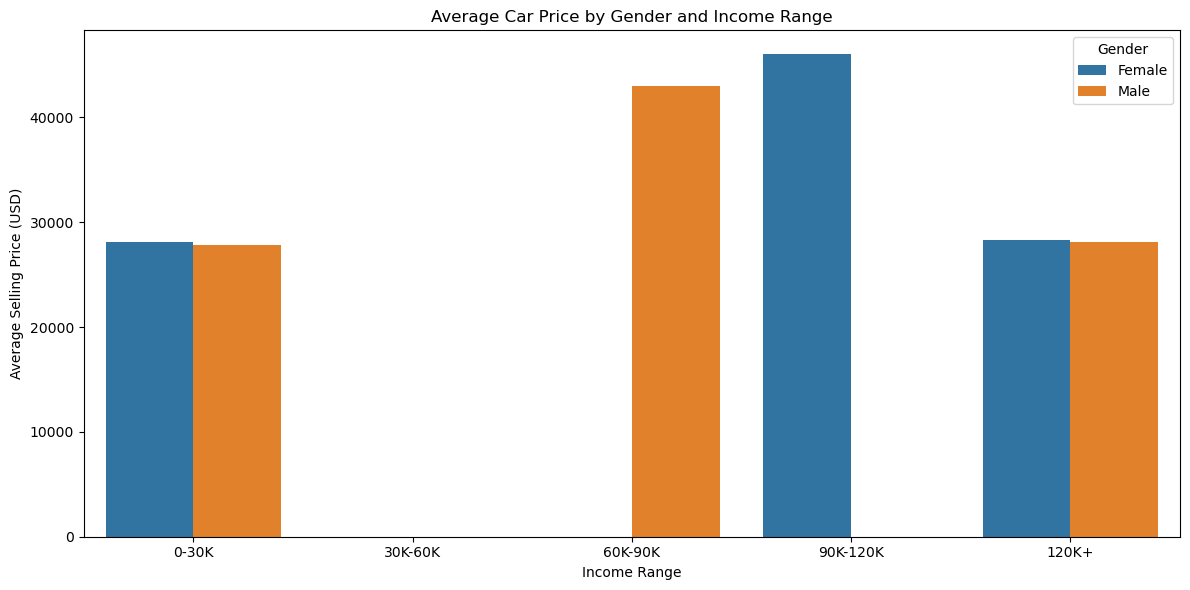

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='income_range', y='price_in_usd', hue='gender', data=avg_price)
plt.title('Average Car Price by Gender and Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Selling Price (USD)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Insights - 
- Price Increases with Income (for Both Genders)
    - As income increases, both males and females tend to spend more on cars — especially from 60K–120K range.

    - This indicates a positive relationship between income and spending behavior.

- Gender Differences Are Minor Overall
In most income groups, males and females spend nearly the same.

    - One notable difference:

    - In the 90K–120K range, females spend slightly more on average than males.

In [47]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range'],
      dtype='object')

**7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

In [50]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range'],
      dtype='object')

In [51]:
df[['dealer_region', 'price_in_usd']]

,dealer_region,price_in_usd
0,Middletown,26000
1,Aurora,19000
2,Greenville,31500
3,Pasco,14000
4,Janesville,24500
...,...,...
23901,Pasco,12000
23902,Middletown,16000
23903,Scottsdale,21000
23904,Austin,31000


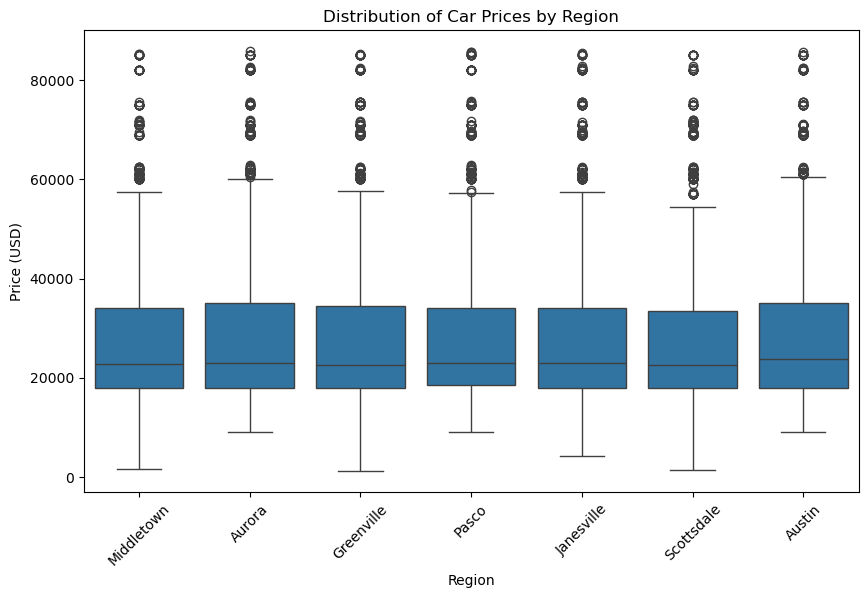

In [52]:
#Distribution of Car Prices by Region
#This tells us how prices vary across regions.
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='dealer_region', y='price_in_usd')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

Insights - 
- Car price distribution is consistent across regions
    - All regions (Middletown, Aurora, Greenville, etc.) have similar median prices and interquartile ranges.
    - This means the typical car price is fairly stable, regardless of region.
    - No region clearly stands out as significantly more expensive or cheaper.

- All regions have high-price outliers
    - Each region shows many outliers above 60,000usd, indicating that luxury or high-end cars are present in all regions.
    - These outliers affect the upper range but not the typical price (which stays around 20,000 usd –35,000 usd).

In [54]:
#Number of Cars Sold by Region
#This tells us how many cars were listed/sold in each region
car_counts = df['dealer_region'].value_counts().reset_index()
car_counts.columns = ['dealer_region', 'count']
car_counts

,dealer_region,count
0,Austin,4135
1,Janesville,3821
2,Scottsdale,3433
3,Pasco,3131
4,Aurora,3130
5,Middletown,3128
6,Greenville,3128


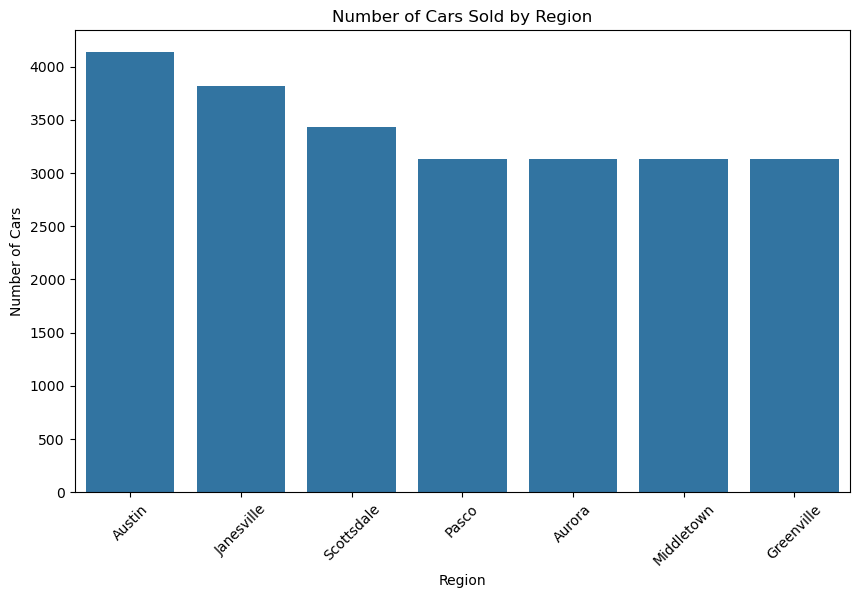

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(data=car_counts, x='dealer_region', y='count')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

Insights - 
- Austin leads in car sales
    - Austin has the highest number of cars sold, followed by Janesville and Scottsdale.
    - This could indicate a larger market, higher demand, or more car listings in Austin.

- Greenville, Middletown, and Aurora have the lowest sales
    - These three regions have similar and lower volumes of car sales compared to others.
    - Possible reasons could include:
        - Smaller population
        - Lower car ownership rates
        - Fewer listings in the dataset from these areas

**8. How does the average car price differ between cars with different engine sizes?**

this questio should be 

**How does the average car price differ between cars with different engine types?**

In [103]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range'],
      dtype='object')

In [126]:
df['engine_clean'] = df['engine'].str.encode('latin1').str.decode('utf-8')

In [128]:
df['engine_clean'].unique()

array(['Double\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [132]:
avg_price_by_engine = df.groupby('engine_clean')['price_in_usd'].mean().reset_index()

In [134]:
avg_price_by_engine

,engine_clean,price_in_usd
0,Double Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


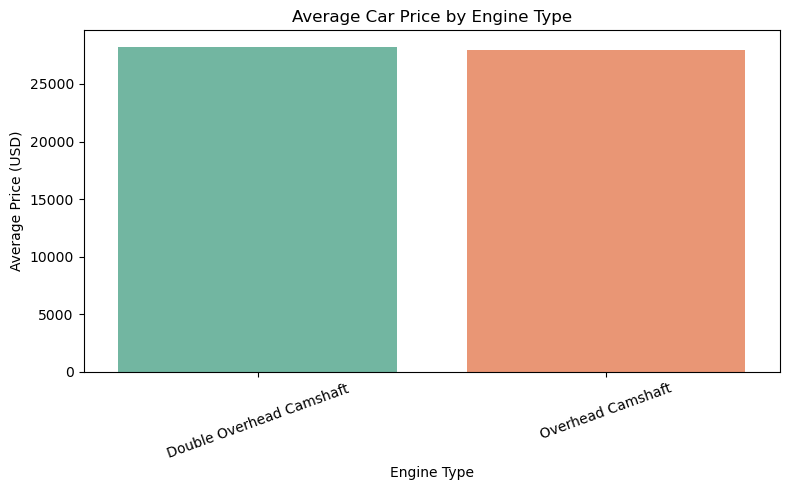

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(data=avg_price_by_engine, x='engine_clean', y='price_in_usd', palette='Set2')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Insight -

- Average Car Price by Engine Type
    - Cars with "Double Overhead Camshaft" engines have a slightly higher average price compared to those with "Overhead Camshaft" engines.

    - he difference, while not drastic, suggests that more advanced engine types (like double overhead) may be associated with slightly premium pricing, possibly due to better performance or being used in higher-end models.

**9. How do car prices vary based on the customer’s annual income bracket?**

In [141]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean'],
      dtype='object')

In [149]:
# df[['annual_income', 'income_range']]
df['income_range'].unique()

['0-30K', '120K+', '60K-90K', '90K-120K']
Categories (5, object): ['0-30K' < '30K-60K' < '60K-90K' < '90K-120K' < '120K+']

In [166]:
avg_price_by_income = df.groupby('income_range')['price_in_usd'].mean().reset_index()
avg_price_by_income

,income_range,price_in_usd
0,0-30K,27884.297820
1,30K-60K,NaN
2,60K-90K,43000.000000
3,90K-120K,46001.000000
4,120K+,28146.802995


In [171]:
avg_price_by_income = avg_price_by_income.dropna(subset=['price_in_usd'])
avg_price_by_income

,income_range,price_in_usd
0,0-30K,27884.297820
2,60K-90K,43000.000000
3,90K-120K,46001.000000
4,120K+,28146.802995


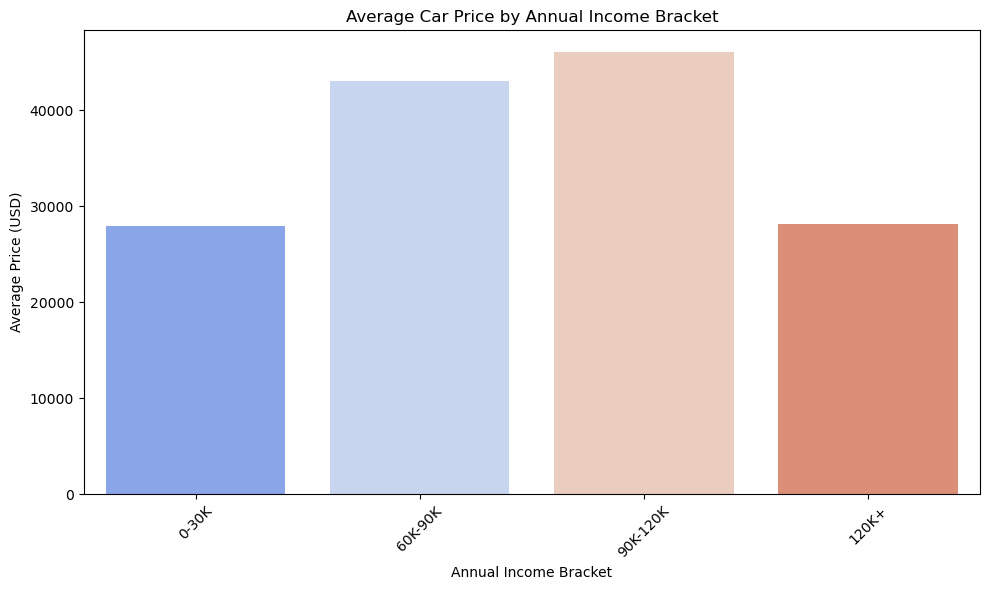

In [173]:
# Optional: define correct order
order = ['0-30K', '60K-90K', '90K-120K', '120K+']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price_by_income, x='income_range', y='price_in_usd', 
            order = order, palette='coolwarm')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight-
- Average Car Price by Income Bracket
    - Customers earning between 90K–120K spend the most on average, with car prices around $46,000, followed by the 60K–90K group.

    - Surprisingly, those in the 120K+ bracket spend less on average (similar to the 0–30K group), which might suggest they prefer more niche or luxury vehicles not represented in this dataset.

**10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

In [177]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean'],
      dtype='object')

In [185]:
top_models = df['model'].value_counts().head(5).index
top_models

Index(['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup'], dtype='object', name='model')

In [208]:
top_model_data = df[df['model'].isin(top_models)]
top_model_data

,car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price_in_usd,dealer_no,body_style,phone,dealer_region,income_range,engine_clean
5,C_CND_000006,2022-01-02,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale,120K+,Overhead Camshaft
69,C_CND_000070,2022-01-04,Toby,Male,13500,Clay Johnson Auto Sales,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,21000,78758-7841,Hatchback,8822935,Pasco,0-30K,Double Overhead Camshaft
91,C_CND_000092,2022-01-05,Mauricio,Male,13500,Race Car Help,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,21001,78758-7841,Hardtop,8188037,Austin,0-30K,Overhead Camshaft
107,C_CND_000108,2022-01-06,Noel,Male,1362000,Chrysler of Tri-Cities,Chevrolet,Prizm,Overhead Camshaft,Manual,Pale White,21200,99301-3882,Hardtop,6633882,Pasco,120K+,Overhead Camshaft
116,C_CND_000117,2022-01-09,Jake,Male,700000,Motor Vehicle Branch Office,Mitsubishi,Diamante,Overhead Camshaft,Manual,Black,49000,78758-7841,Hatchback,7757499,Austin,120K+,Overhead Camshaft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23868,C_CND_023869,2023-12-30,Youenn,Female,13500,Star Enterprises Inc,Volkswagen,Passat,DoubleÂ Overhead Camshaft,Auto,Pale White,31000,99301-3882,Hatchback,8231925,Scottsdale,0-30K,Double Overhead Camshaft
23882,C_CND_023883,2023-12-31,Victoria,Male,501000,Suburban Ford,Chevrolet,Prizm,Overhead Camshaft,Manual,Red,22001,53546-9427,Hatchback,8455104,Janesville,120K+,Overhead Camshaft
23884,C_CND_023885,2023-12-31,Winnie,Male,820500,U-Haul CO,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45500,78758-7841,Hatchback,8519129,Austin,120K+,Double Overhead Camshaft
23890,C_CND_023891,2023-12-31,Joaquin,Male,2450000,Saab-Belle Dodge,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,20001,60504-7114,Hardtop,6172324,Aurora,120K+,Overhead Camshaft


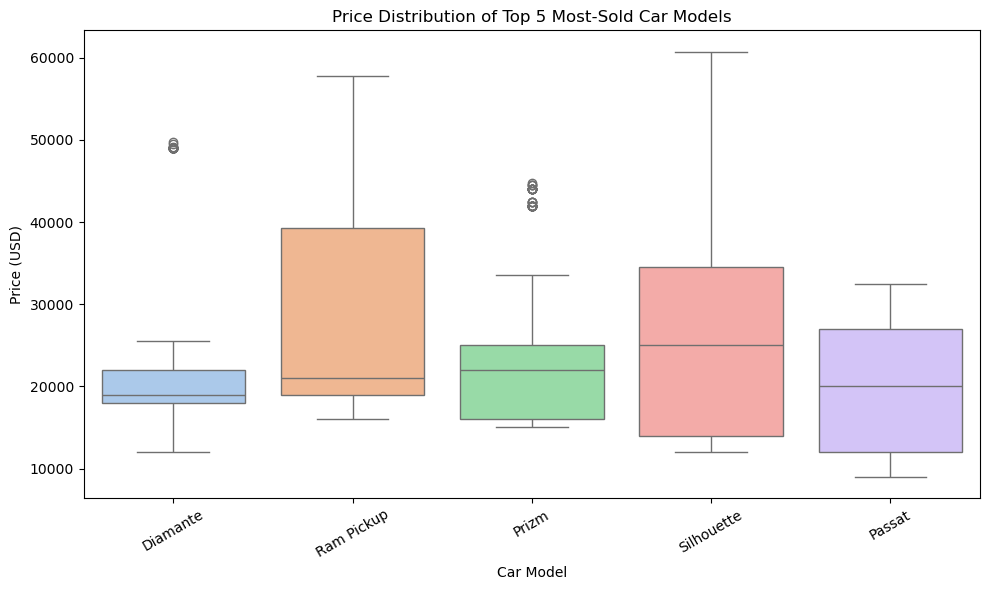

In [210]:
plt.figure(figsize=(10,6))
sns.boxplot(data=top_model_data, x='model', y='price_in_usd', palette='pastel')
plt.title('Price Distribution of Top 5 Most-Sold Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Insight - 

- Price Distribution of Top 5 Car Models
    - Ram Pickup and Silhouette have the widest price ranges, indicating they are sold in multiple trims or configurations, ranging from budget to high-end.

    - Diamante and Prizm have relatively narrower and lower price ranges, suggesting they are more consistent in pricing, possibly targeting a mid-range customer segment.

**11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation ?**

Ans - This question can not answered because engine size column is not present.

In [214]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean'],
      dtype='object')

In [216]:
df['engine']

0        DoubleÂ Overhead Camshaft
1        DoubleÂ Overhead Camshaft
2                Overhead Camshaft
3                Overhead Camshaft
4        DoubleÂ Overhead Camshaft
                   ...            
23901            Overhead Camshaft
23902    DoubleÂ Overhead Camshaft
23903            Overhead Camshaft
23904    DoubleÂ Overhead Camshaft
23905    DoubleÂ Overhead Camshaft
Name: engine, Length: 23906, dtype: object

**12.  Is there any seasonal trend in car sales based on the date of sale?**

In [238]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean', 'month', 'month_number'],
      dtype='object')

In [230]:
df['month'] = df['date'].dt.month_name()

In [236]:
df['month_number'] = df['date'].dt.month

In [244]:
monthly_sales = df.groupby(['month', 'month_number']).size().reset_index(name='sales_count')
monthly_sales

,month,month_number,sales_count
0,April,4,1655
1,August,8,1705
2,December,12,3546
3,February,2,735
4,January,1,790
5,July,7,1725
6,June,6,1715
7,March,3,1535
8,May,5,1895
9,November,11,3470


In [248]:
monthly_sales = monthly_sales.sort_values('month_number')
monthly_sales

,month,month_number,sales_count
4,January,1,790
3,February,2,735
7,March,3,1535
0,April,4,1655
8,May,5,1895
6,June,6,1715
5,July,7,1725
1,August,8,1705
11,September,9,3305
10,October,10,1830


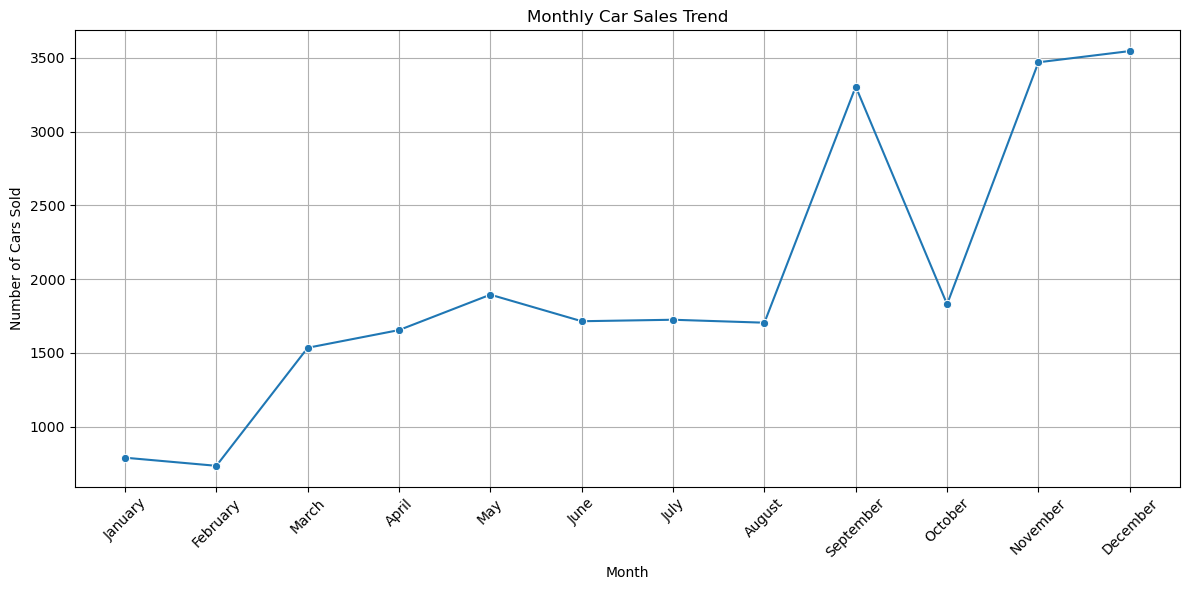

In [252]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='sales_count', marker='o', sort=False)
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights -
- Car sales peak sharply in November and December, with over 3,500 cars sold per month, suggesting a strong year-end buying trend — possibly due to offers, bonuses, or festive seasons.

- Lowest sales occur in January and February, indicating a post-holiday dip in demand, which is common across many markets.

**13. How does the car price distribution change when considering different combinations of body style and 
transmission type?**

In [256]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean', 'month', 'month_number'],
      dtype='object')

In [258]:
df[['price_in_usd', 'body_style', 'transmission']]

,price_in_usd,body_style,transmission
0,26000,SUV,Auto
1,19000,SUV,Auto
2,31500,Passenger,Manual
3,14000,SUV,Manual
4,24500,Hatchback,Auto
...,...,...,...
23901,12000,Passenger,Manual
23902,16000,Hardtop,Auto
23903,21000,Sedan,Manual
23904,31000,Passenger,Auto


In [260]:
df_clean = df.dropna(subset=['price_in_usd', 'body_style', 'transmission'])

In [272]:
df_clean['body_trans']= df_clean['body_style'] + ' / ' + df_clean['transmission']

In [276]:
df_clean.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean', 'month', 'month_number', 'body_trans'],
      dtype='object')

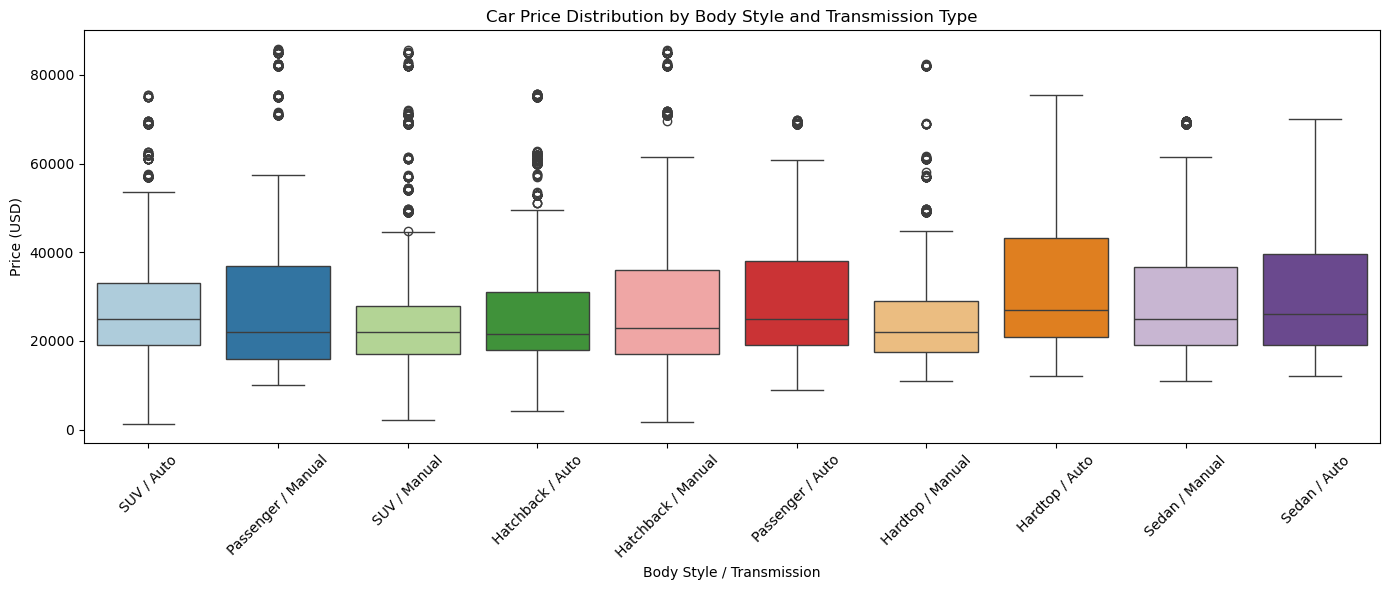

In [278]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_clean, x='body_trans', y='price_in_usd', palette='Paired')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style / Transmission')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights - 

- Hardtop / Automatic cars show the widest price range and highest upper pricing, indicating they include both premium and luxury models.

- Hatchback / Manual and SUV / Manual combinations have lower and more compact price distributions, suggesting they target more budget-conscious consumers with consistent pricing.

**14.  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

Ans - 'engine size' is not available so this question can not be answered.

**15. How does the average car price vary across different car models and engine types?**

In [287]:
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_in_usd', 'dealer_no', 'body_style', 'phone', 'dealer_region',
       'income_range', 'engine_clean', 'month', 'month_number'],
      dtype='object')

In [291]:
df[['price_in_usd', 'model', 'engine_clean']]

,price_in_usd,model,engine_clean
0,26000,Expedition,Double Overhead Camshaft
1,19000,Durango,Double Overhead Camshaft
2,31500,Eldorado,Overhead Camshaft
3,14000,Celica,Overhead Camshaft
4,24500,TL,Double Overhead Camshaft
...,...,...,...
23901,12000,Voyager,Overhead Camshaft
23902,16000,Prizm,Double Overhead Camshaft
23903,21000,328i,Overhead Camshaft
23904,31000,Metro,Double Overhead Camshaft


In [297]:
avg_price_by_model = df.groupby('model')['price_in_usd'].mean().sort_values(ascending=False)
print(avg_price_by_model)

model
Catera     56836.933333
DeVille    46154.050000
Contour    45309.079646
Integra    44604.000000
Tacoma     44576.743017
               ...     
Montero    16035.000000
C-Class    14538.414474
Escort     12901.092105
Cirrus     12727.243243
Mirage      9063.368421
Name: price_in_usd, Length: 154, dtype: float64


In [299]:
avg_price_by_engine = df.groupby('engine_clean')['price_in_usd'].mean().sort_values(ascending=False)
print(avg_price_by_engine)

engine_clean
Double Overhead Camshaft    28248.525972
Overhead Camshaft           27914.710631
Name: price_in_usd, dtype: float64


In [316]:
pivot = df.pivot_table(index='model', columns='engine_clean', values='price_in_usd', aggfunc='mean')
pivot.head()

engine_clean,Double Overhead Camshaft,Overhead Camshaft
model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
